In [1]:
using Distributions
using ConjugatePriors

using Random
using Printf
using JLD2

using PyPlot; PyPlot.svg(true)

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/dicai/.julia/packages/PyPlot/XaELc/src/init.jl:198


true

In [2]:
include("../GeometricNats.jl")
include("../mcmc_utils.jl")
include("../example_1DGaussian.jl")

generate_data (generic function with 1 method)

In [3]:
const σ0 = 1.0
function generate_data(N)
    t = rand(Normal(0,1))
    return t, rand(Normal(t, σ0), N)
end

Random.seed!(1234)
# generate data
N = 100;
θ_true, data = generate_data(N)

(0.8673472019512456, [-0.03439661390557147, 0.37286844844701167, -0.035567091913995985, 1.7317485152047611, 3.079224701525593, 1.4001604841207838, 0.5956118059166249, 1.369681698339913, 0.35036358125797695, 0.3068458637704691  …  0.5509604235401764, 1.13308995309692, 1.9329573522208, 2.2523578683947645, 0.9472985676671156, 0.03397794752420025, 0.4241005702929401, -0.7958786830936997, 0.3461181467358453, 1.051323608992372])

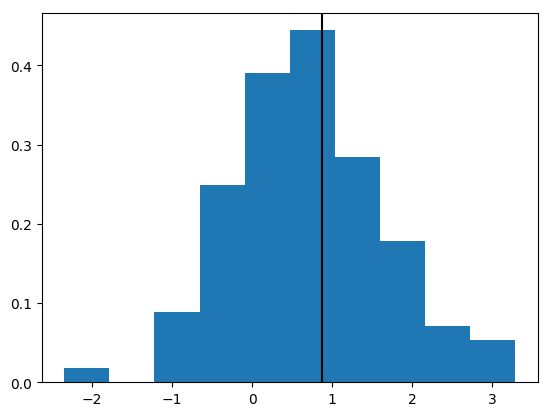

PyObject <matplotlib.lines.Line2D object at 0x12ca3db90>

In [4]:
hist(data, bins=10, density=true)
axvline(θ_true, c="k")

In [5]:
# RWMH update for K
update_K_RWMH_default!(results, inputs, log_density) = update_K_RWMH!(results, inputs, log_density; Lp=nothing)

# θ updates
sample_θ_1D_SS_default!(results, inputs, log_density) = sample_θ_1D_SS!(results, inputs, log_density; widths=1.0, step_out=true, Lp=nothing)
sample_θ_RWMH_default!(results, inputs, log_density) = sample_θ_RWMH!(results, inputs, log_density; sigma=0.5, Lp=nothing)

sample_θ_RWMH_default! (generic function with 1 method)

In [6]:
# truncation parameter
γ0 = 0.01

# draw K from prior
K = rand(Geometric(γ0))+1

# draw initial value from the prior
θ0 = rand(Normal(0, 1))

inputs_mh = Dict{Symbol, Any}(
    :data => data,
    :N => length(data),
    :θ_init => [θ0],
    :K_init => K,
    :γ => γ0,
    :curr_like_signs => nothing
  )

Dict{Symbol,Any} with 6 entries:
  :γ               => 0.01
  :N               => 100
  :K_init          => 113
  :curr_like_signs => nothing
  :θ_init          => [1.03132]
  :data            => [-0.0343966, 0.372868, -0.0355671, 1.73175, 3.07922, 1.40…

In [7]:
T = 5000

# create results: start with initial values
results_mh = Results([inputs_mh[:θ_init]], [inputs_mh[:K_init]], [1], [0], [1], [], "MF-MH")

@time inference!(results_mh, T, inputs_mh, update_K_RWMH_default!, sample_θ_RWMH_default!, log_density_estimator)

Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
Iteration: 2000
Iteration: 2100
Iteration: 2200
Iteration: 2300
Iteration: 2400
Iteration: 2500
Iteration: 2600
Iteration: 2700
Iteration: 2800
Iteration: 2900
Iteration: 3000
Iteration: 3100
Iteration: 3200
Iteration: 3300
Iteration: 3400
Iteration: 3500
Iteration: 3600
Iteration: 3700
Iteration: 3800
Iteration: 3900
Iteration: 4000
Iteration: 4100
Iteration: 4200
Iteration: 4300
Iteration: 4400
Iteration: 4500
Iteration: 4600
Iteration: 4700
Iteration: 4800
Iteration: 4900
Iteration: 5000
 75.727514 seconds (2.49 G allocations: 37.210 GiB, 6.75% gc time)


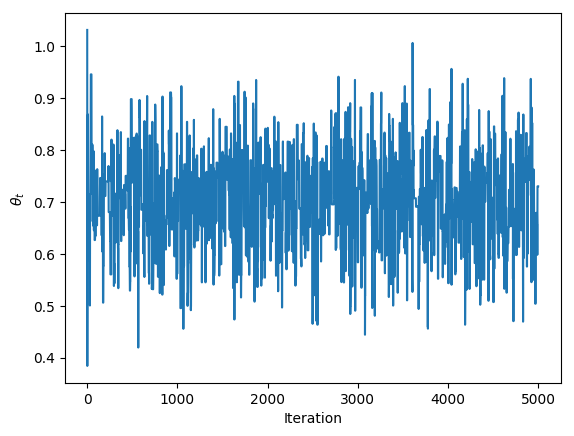

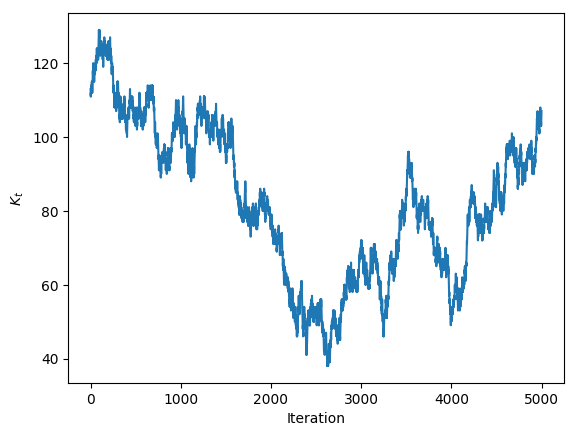

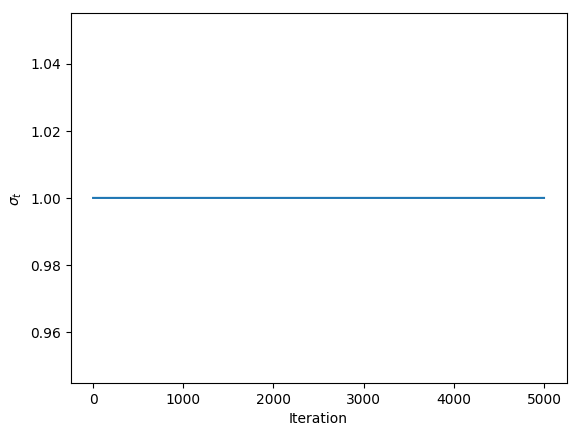

PyObject Text(24.400000000000013, 0.5, '$\\sigma_t$')

In [8]:
figure(); PyPlot.plot(results_mh.θs); PyPlot.xlabel("Iteration"); PyPlot.ylabel(raw"$\theta_t$")

figure(); PyPlot.plot(results_mh.Ks); PyPlot.xlabel("Iteration"); PyPlot.ylabel(raw"$K_t$")

figure(); PyPlot.plot(results_mh.σs); xlabel("Iteration"); ylabel(raw"$\sigma_t$")